In [62]:
import numpy as np
import seaborn as sns

In [90]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=5, n_features=4, random_state=0)

In [92]:
class PCA():
    def __init__(self):
        pass
    
    def fit_transform(self,X):
        m,n = X.shape
        means = np.mean(X,axis=0).reshape(n,1)
        cols = [X[:,i] for i in range(X.shape[1])]
        covs = np.cov(cols)
        eig_val, eig_vec = np.linalg.eig(covs)
        eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        matrix_w = np.array([eig_pairs[i][1].reshape(n,1) for i in range(n_features)]).T.reshape(n,2)
        transformed = matrix_w.T.dot(X.T-means).T
        return transformed
        

In [93]:
pca = PCA()
transformed = pca.fit_transform(X)

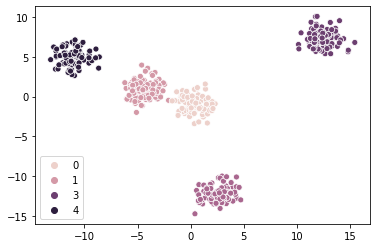

In [94]:
sns.scatterplot(transformed[:,0],transformed[:,1],hue=y)